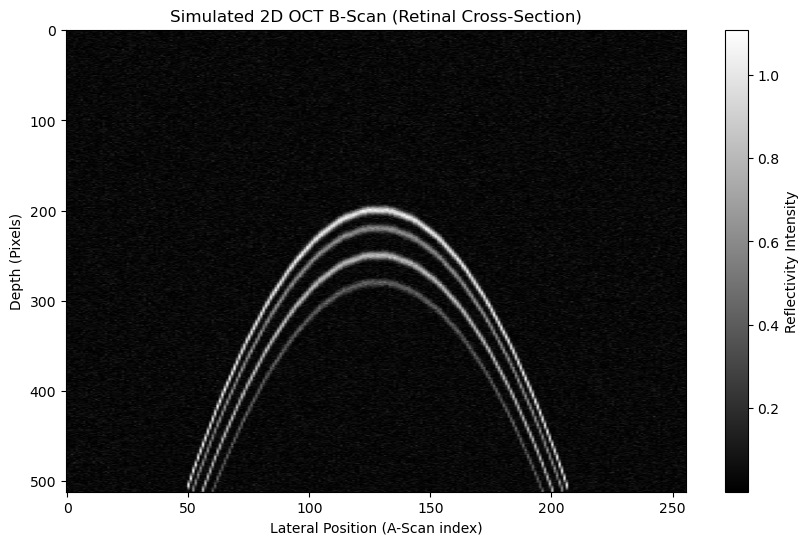

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup Grid
depth_points = 512    # Resolution in depth (Y)
lateral_points = 256  # Number of A-scans (X)
b_scan = np.zeros((depth_points, lateral_points))

# 2. Define Tissue Anatomy (Curved Layers)
x_coords = np.arange(lateral_points)
# Creating a slight curve using a parabola
base_curve = 0.05 * (x_coords - lateral_points/2)**2 + 200

# Layers offsets (in pixels)
layer_offsets = [0, 20, 50, 80] # Distances between retinal layers
layer_strengths = [1.0, 0.6, 0.8, 0.4] # Reflectivity of each layer

# 3. Generate the B-Scan
# We iterate through every lateral position (every A-scan)
for x in range(lateral_points):
    a_scan = np.zeros(depth_points)
    for offset, strength in zip(layer_offsets, layer_strengths):
        depth = int(base_curve[x] + offset)
        if depth < depth_points:
            # Add a "spike" for each tissue interface
            # We use a small Gaussian to represent the axial resolution (sigma_z)
            z = np.arange(depth_points)
            a_scan += strength * np.exp(-(z - depth)**2 / (2 * 3**2))
            
    b_scan[:, x] = a_scan

# 4. Add "Speckle Noise" 
# Real OCT has a grainy texture due to light interference
noise = np.random.normal(0, 0.05, b_scan.shape)
b_scan_noisy = np.abs(b_scan + noise)

# 5. Visualization
plt.figure(figsize=(10, 6))
plt.imshow(b_scan_noisy, cmap='gray', aspect='auto')
plt.title("Simulated 2D OCT B-Scan (Retinal Cross-Section)")
plt.xlabel("Lateral Position (A-Scan index)")
plt.ylabel("Depth (Pixels)")
plt.colorbar(label="Reflectivity Intensity")
plt.show()